In [2]:
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [3]:
digits=load_digits()

In [4]:
xtrain,xtest,ytrain,ytest=train_test_split(digits.data,digits.target,test_size=0.2)
len(xtrain)

1437

In [10]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=1)

In [11]:
knn.score(xtest,ytest)

0.9888888888888889

In [7]:
clf=GridSearchCV(knn,{
    'n_neighbors':[1,2,3,4,5,6,7,8,9,10]
},cv=5,return_train_score=False)
clf.fit(xtrain,ytrain)
clf.cv_results_

{'mean_fit_time': array([0.00232425, 0.00039883, 0.00312433, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00020394, 0.00059795]),
 'std_fit_time': array([0.00364856, 0.00048846, 0.00624866, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00040789, 0.00048823]),
 'mean_score_time': array([0.00491614, 0.00439367, 0.00430527, 0.00412464, 0.00624857,
        0.00624843, 0.00626702, 0.00312471, 0.00728965, 0.005725  ]),
 'std_score_time': array([0.00478422, 0.00224289, 0.00610659, 0.00607179, 0.0076529 ,
        0.00765273, 0.00767556, 0.00624943, 0.00506785, 0.00191491]),
 'param_n_neighbors': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 1},
  {'n_neighbors': 2},
  {'n_neighbors': 3},
  {'n_neighbors': 4},
  {'n_neighbors': 5},
  {'n_neighbors': 6},


In [8]:
df=pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002324,0.003649,0.004916,0.004784,1,{'n_neighbors': 1},0.982639,0.993056,0.982578,0.986063,0.986063,0.986080,0.003815,2
1,0.000399,0.000488,0.004394,0.002243,2,{'n_neighbors': 2},0.979167,0.989583,0.982578,0.989547,0.986063,0.985388,0.004049,3
2,0.003124,0.006249,0.004305,0.006107,3,{'n_neighbors': 3},0.986111,0.986111,0.982578,0.989547,0.986063,0.986082,0.002204,1
3,0.000000,0.000000,0.004125,0.006072,4,{'n_neighbors': 4},0.986111,0.972222,0.982578,0.986063,0.979094,0.981214,0.005190,8
4,0.000000,0.000000,0.006249,0.007653,5,{'n_neighbors': 5},0.986111,0.982639,0.979094,0.982578,0.982578,0.982600,0.002219,4
5,0.000000,0.000000,0.006248,0.007653,6,{'n_neighbors': 6},0.986111,0.982639,0.982578,0.982578,0.979094,0.982600,0.002219,4
6,0.000000,0.000000,0.006267,0.007676,7,{'n_neighbors': 7},0.986111,0.982639,0.982578,0.982578,0.979094,0.982600,0.002219,4
7,0.000000,0.000000,0.003125,0.006249,8,{'n_neighbors': 8},0.986111,0.982639,0.982578,0.979094,0.979094,0.981903,0.002626,7
8,0.000204,0.000408,0.007290,0.005068,9,{'n_neighbors': 9},0.979167,0.982639,0.982578,0.979094,0.982578,0.981211,0.001699,9
9,0.000598,0.000488,0.005725,0.001915,10,{'n_neighbors': 10},0.975694,0.982639,0.975610,0.975610,0.979094,0.977729,0.002796,10


In [9]:
df[['param_n_neighbors','mean_test_score']]

,param_n_neighbors,mean_test_score
0,1,0.986080
1,2,0.985388
2,3,0.986082
3,4,0.981214
4,5,0.982600
5,6,0.982600
6,7,0.982600
7,8,0.981903
8,9,0.981211
9,10,0.977729


In [12]:
ypredict=knn.predict(xtest)


In [13]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest,ypredict)
cm

array([[34,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 43,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 30,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 40,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 43,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 27,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 32,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 40,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 34,  0],
       [ 0,  0,  0,  1,  1,  1,  0,  0,  0, 33]], dtype=int64)

In [14]:
import seaborn as sns


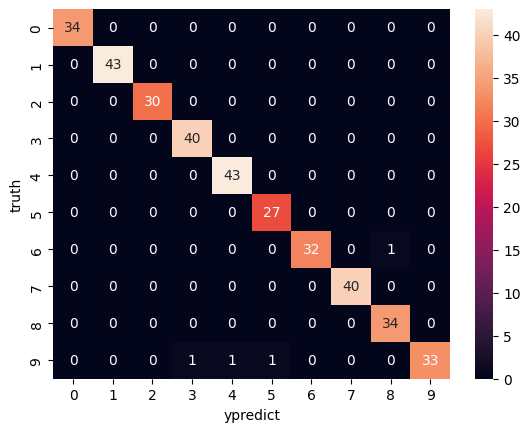

In [15]:
sns.heatmap(cm,annot=True)
plt.xlabel('ypredict')
plt.ylabel('truth')
plt.show()
